The study uses descriptive analysis for the study with the data gathered originating from several libraries that is Csv,Numpy,pandas,seaborn, matplot among several libraries.The analysis has used three data sets for analysis; this include imdb.title basics;imdb.title ratings& bom.movie gross to give an insight on which genre combination Microsoft should employ to maximize their profits through high domestic gross sales

In [1]:
#Importing libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data=pd.read_csv()

df1=pd.read_csv(r"C:\Users\Kola500\Downloads\dsc-phase-1-project-master\dsc-phase-1-project-master\zippedData\imdb.title.basics.csv\title.basics.csv")

df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
df2=pd.read_csv(r"C:\Users\Kola500\Downloads\title.ratings.csv")

df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
df3=pd.read_csv(r"C:\bom.movie_gross.csv")
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
df4=pd.merge(df1,df2, on='tconst')

df4.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [7]:
df5= pd.concat([df3, df4], axis=1, join='outer')

df5.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Inception,WB,292600000.0,535700000,2010.0,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [8]:
# Dropping columns 
columns_to_drop = ['title', 'studio', 'foreign_gross', 'year','tconst', 'original_title']

# Drop the specified columns
df5.drop(columns_to_drop, axis=1, inplace=True)

df5.head()


,domestic_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,415000000.0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,334200000.0,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,296000000.0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,292600000.0,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,238700000.0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [9]:
df5.shape

(73856, 7)

In [10]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   domestic_gross   3359 non-null   float64
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 3.9+ MB


The data has 73856 records of 7 columns. We can see that domestic_gross,genres& runtime has a few missing values.
The datatypes present in the multivariate dataset are 3 float, 2 ,intgers and 2 object columns.

In [11]:
df5.describe()

,domestic_gross,start_year,runtime_minutes,averagerating,numvotes
count,3.359000e+03,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2.874585e+07,2014.276132,94.654040,6.332729,3.523662e+03
std,6.698250e+07,2.614807,208.574111,1.474978,3.029402e+04
min,1.000000e+02,2010.000000,3.000000,1.000000,5.000000e+00
25%,1.200000e+05,2012.000000,81.000000,5.500000,1.400000e+01
50%,1.400000e+06,2014.000000,91.000000,6.500000,4.900000e+01
75%,2.790000e+07,2016.000000,104.000000,7.400000,2.820000e+02
max,9.367000e+08,2019.000000,51420.000000,10.000000,1.841066e+06


DATA CLEANING PROCESS

In [12]:
#(a)Missing Values

df5.isna().sum()

domestic_gross     70497
primary_title          0
start_year             0
runtime_minutes     7620
genres               804
averagerating          0
numvotes               0
dtype: int64

In [13]:
#percenatge of misssing values
df5.isna().mean()

domestic_gross     0.954520
primary_title      0.000000
start_year         0.000000
runtime_minutes    0.103174
genres             0.010886
averagerating      0.000000
numvotes           0.000000
dtype: float64

Since runtime_minutes & genres has a small percentage of the data  missing, dropping those rows or columns might not significantly impact my analysis.

In [14]:
# Drop rows with missing values in 'runtime_minutes' and 'genres'
df5.dropna(subset=['runtime_minutes', 'genres'], inplace=True)

df5

,domestic_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,415000000.0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,334200000.0,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,296000000.0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,238700000.0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,312400000.0,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...
73849,NaN,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,NaN,Swarm Season,2019,86.0,Documentary,6.2,5
73851,NaN,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,NaN,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


For the domestic gross;the number of missing values is 95% thus dropping the missing values might affect my analysis hence imputation will be the best technique to use in retaining more data & also reducing the impact of dropping of missing values.

In [17]:
# Impute missing values for domestic_gross using median
median_imputation = df5['domestic_gross'].fillna(df5['domestic_gross'].median())

df5.head()

,domestic_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,415000000.0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,334200000.0,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,296000000.0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,238700000.0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,312400000.0,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [19]:
df5.shape

(65720, 7)

#CHECK FOR DUPLICATES

In [20]:
df5.duplicated().sum()

0

In [ ]:
There are no duplicates hence we proceed with the data cleaning

In [ ]:
#FEATURE ENGINEERING
It involves creating new features or transforming existing ones to improve the performance of machine learning models or gain better insights from the data
Creating new features from existing ones to capture additional information in this case i will employ rating audience & rating preference in terms of 'Poor', 'Fair', 'Average', 'Good', 'Excellent' 

#Using rating_audience to generate new columns

#The rating:*

# up to 13 years - 	rated PG 
# 14 to 17 years	restricted
# 17 & above	- No restriction

In [22]:
# Assuming 'rating_audience' is the column representing the average rating of individuals in the DataFrame

# Define the bins and labels
bins = [0, 13, 17, float('inf')]
labels = ['rated PG', 'restricted', 'no restriction']

# Create a new column 'rating_audience' based on average rating
df5['rating_audience'] = pd.cut(df5['averagerating'], bins=bins, labels=labels, right=False)

# Check the result
print(df5[['averagerating', 'rating_audience']].head())

df5.head()

   averagerating rating_audience
0            7.0        rated PG
1            7.2        rated PG
2            6.9        rated PG
4            6.5        rated PG
6            8.1        rated PG


,domestic_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating_audience
0,415000000.0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,rated PG
1,334200000.0,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,rated PG
2,296000000.0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,rated PG
4,238700000.0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,rated PG
6,312400000.0,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,rated PG


In [23]:
# change the case of rating_audience
df5['rating_audience'] = df5['rating_audience'].str.capitalize()
df5.iloc[0:6]

,domestic_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating_audience
0,415000000.0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Rated pg
1,334200000.0,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Rated pg
2,296000000.0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Rated pg
4,238700000.0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Rated pg
6,312400000.0,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Rated pg
7,200800000.0,Pál Adrienn,2010,136.0,Drama,6.8,451,Rated pg


In [24]:
# Define the bins and labels for the rating
bins = [0, 2, 4, 6, 8, 10]
labels = ['Poor', 'Fair', 'Average', 'Good', 'Excellent']

# Create a new column 'Rating' by grouping values into the specified bins
df5['Rating'] = pd.cut(df5['averagerating'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
df5.head()

,domestic_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating_audience,Rating
0,415000000.0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Rated pg,Good
1,334200000.0,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Rated pg,Good
2,296000000.0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Rated pg,Good
4,238700000.0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Rated pg,Good
6,312400000.0,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Rated pg,Excellent


HANDLING OUTLIERS

In [25]:
import matplotlib.pyplot as plt

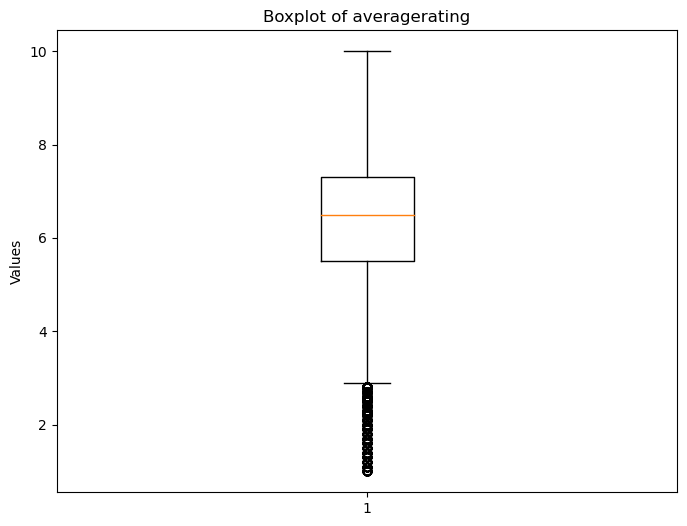

In [26]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.boxplot(df5['averagerating'])  # Replace 'specific_column' with the column you want to plot
plt.title('Boxplot of averagerating')  # Add a title
plt.ylabel('Values')  # Add label for y-axis
plt.show()

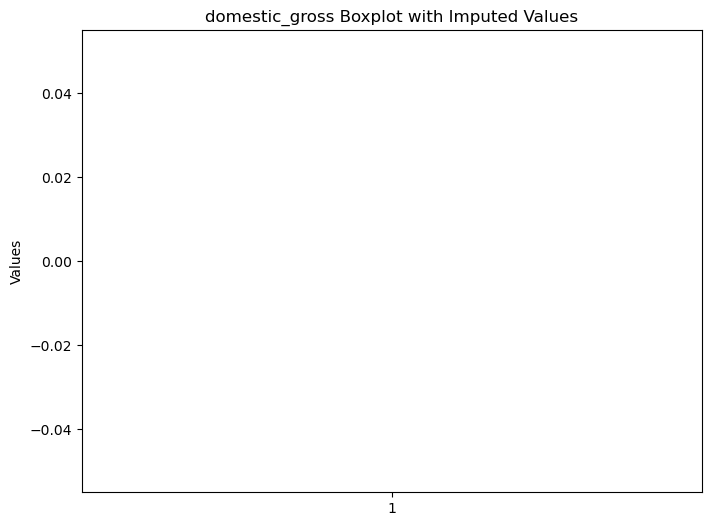

In [30]:
plt.figure(figsize=(8, 6))
plt.boxplot(df5['domestic_gross'])
plt.title('domestic_gross Boxplot with Imputed Values')
plt.ylabel('Values')
plt.show()

When there are no outliers in a dataset, it implies that the data points are relatively close to each other and do not exhibit extreme values. Hence the domestic_gross has no outliers.

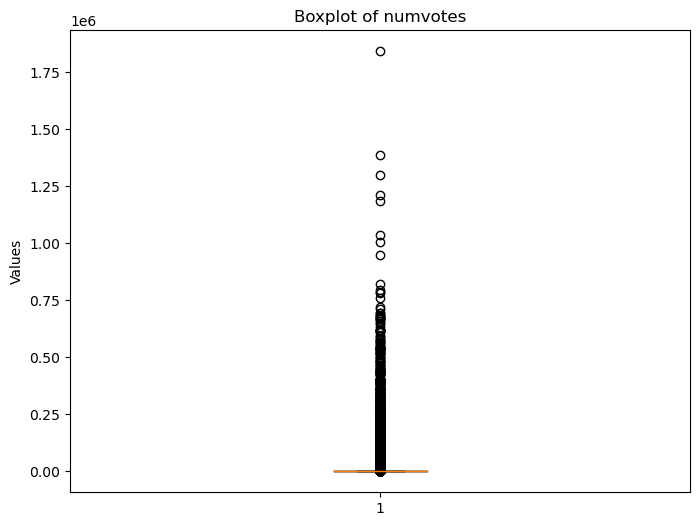

In [31]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.boxplot(df5['numvotes'])  # Replace 'specific_column' with the column you want to plot
plt.title('Boxplot of numvotes')  # Add a title
plt.ylabel('Values')  # Add label for y-axis
plt.show()

In [ ]:
# Using techniques to remove outliers
1. Z-Score - Normal distribution
2. IQR - Skewed distribution

In [35]:
uaveragerating = df5['averagerating'].mean() + 3*df5['averagerating'].std()
print("Upper limit averagerating =",uaveragerating)
laveragerating = df5['averagerating'].mean() - 3*df5['averagerating'].std()
print("Lower limit averagerating =",laveragerating)

Upper limit averagerating = 10.697536071543306
Lower limit averagerating = 1.9442685541414182


2) INTERQUARILE RANGE

In [38]:
#create a function to find outliers using IQR
def find_outliers_IQR(df5, column):

   q1=df5[column].quantile(0.25)
   q3=df5[column].quantile(0.75)

   IQR=q3-q1
   outliers = df5[((df5[column]<(q1-1.5*IQR)) | (df5[column]>(q3+1.5*IQR)))]
   print(q1,q3)
   return outliers

# Find the outliers in the runtime_minutes column using the IQR function created
find_outliers_IQR(df5, 'averagerating')

5.5 7.3


,domestic_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating_audience,Rating
16,107000000.0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Rated pg,Poor
321,12000.0,Neowolf,2010,88.0,"Horror,Thriller",2.3,418,Rated pg,Fair
361,100000000.0,Rift,2011,100.0,"Horror,Thriller",2.7,404,Rated pg,Fair
378,55100000.0,Hyenas,2011,92.0,Horror,2.8,952,Rated pg,Fair
396,73000000.0,Westbrick Murders,2010,90.0,"Action,Crime,Thriller",2.7,351,Rated pg,Fair
...,...,...,...,...,...,...,...,...,...
73722,NaN,Klubare,2018,100.0,"Comedy,Crime,Music",2.2,35,Rated pg,Fair
73729,NaN,0009: The Sharks Make Contact,2019,133.0,"Animation,Comedy,Musical",1.4,19,Rated pg,Poor
73747,NaN,Roy Kiyoshi: The Untold Story,2019,86.0,Horror,2.1,38,Rated pg,Fair
73812,NaN,Schwarzer Garten,2018,51.0,"Horror,Mystery",2.7,6,Rated pg,Fair


In [39]:
df5.shape

(65720, 9)

In [40]:
#create a function to drop outliers using IQR
def drop_outliers_IQR(df5, column):

   q1=df5[column].quantile(0.25)
   q3=df5[column].quantile(0.75)

   IQR=q3-q1
   new_df5 = df5[((df5[column]>(q1-1.5*IQR)) | (df5[column]<(q3+1.5*IQR)))]

   return new_df5

In [41]:
#dropping outliers

drop_outliers_IQR(df5, 'averagerating')

,domestic_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating_audience,Rating
0,415000000.0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Rated pg,Good
1,334200000.0,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Rated pg,Good
2,296000000.0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Rated pg,Good
4,238700000.0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Rated pg,Good
6,312400000.0,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Rated pg,Excellent
...,...,...,...,...,...,...,...,...,...
73849,NaN,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,Rated pg,Excellent
73850,NaN,Swarm Season,2019,86.0,Documentary,6.2,5,Rated pg,Good
73851,NaN,Diabolik sono io,2019,75.0,Documentary,6.2,6,Rated pg,Good
73852,NaN,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Rated pg,Excellent


In [42]:
# Find the outliers using IQR for the domestic_gross using the function created
find_outliers_IQR(df5,'numvotes')

16.0 352.0


,domestic_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating_audience,Rating
2,296000000.0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Rated pg,Good
16,107000000.0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Rated pg,Poor
27,162000000.0,Dark Blood,2012,86.0,Thriller,6.6,1053,Rated pg,Good
31,88800000.0,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Rated pg,Good
32,97000000.0,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Rated pg,Fair
...,...,...,...,...,...,...,...,...,...
73376,NaN,Alien Warfare,2019,88.0,"Action,Sci-Fi",2.6,1509,Rated pg,Fair
73388,NaN,Leaving Neverland,2019,240.0,Documentary,7.1,19632,Rated pg,Good
73683,NaN,Panodrama,2019,64.0,Documentary,3.1,2220,Rated pg,Fair
73730,NaN,The Hard Way,2019,92.0,Action,4.7,1214,Rated pg,Average


In [43]:
#dropping outliers in numvotes

drop_outliers_IQR(df5, 'numvotes')

,domestic_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating_audience,Rating
0,415000000.0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Rated pg,Good
1,334200000.0,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Rated pg,Good
2,296000000.0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Rated pg,Good
4,238700000.0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Rated pg,Good
6,312400000.0,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Rated pg,Excellent
...,...,...,...,...,...,...,...,...,...
73849,NaN,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,Rated pg,Excellent
73850,NaN,Swarm Season,2019,86.0,Documentary,6.2,5,Rated pg,Good
73851,NaN,Diabolik sono io,2019,75.0,Documentary,6.2,6,Rated pg,Good
73852,NaN,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Rated pg,Excellent


Exploratory Data Analysis

To visualize EDA for domestic_gross  and genre, we can use various plots and charts to explore the relationship between these two variables.

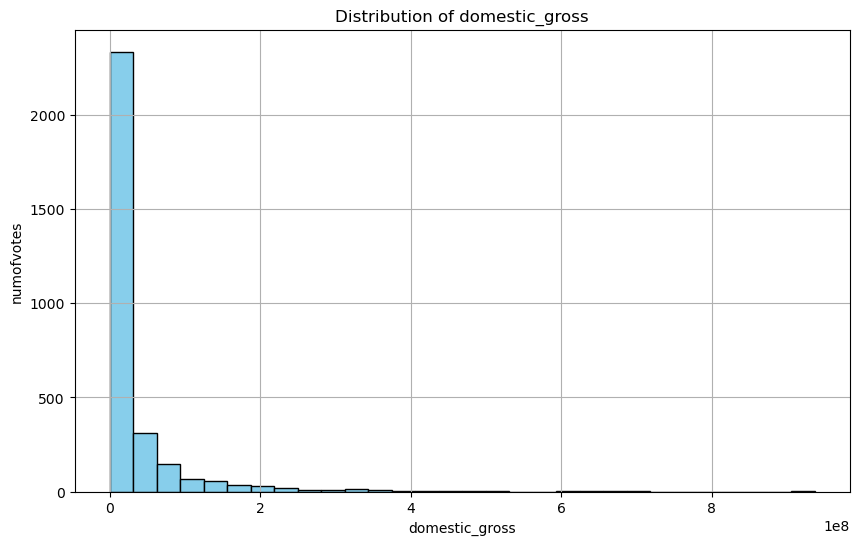

In [57]:
# Create a new dataframe with domestic gross earnings per numof votes
plt.figure(figsize=(10, 6))
plt.hist(df5['domestic_gross'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('domestic_gross')
plt.ylabel('numofvotes')
plt.title('Distribution of domestic_gross')
plt.grid(True)
plt.show()

In [ ]:
From the above analysis the  less costly a movie is the  higher the number votes it gets as compared to a more costly one since its cost effective.

Unlike a highly priced movie hence a decrease in the number of votes .

genres
Drama                         1.318905e+10
Comedy                        6.635318e+09
Documentary                   5.996756e+09
Comedy,Drama                  4.173104e+09
Thriller                      2.265230e+09
                                  ...     
Comedy,Documentary,War        0.000000e+00
Action,Adult,Comedy           0.000000e+00
Action,Romance,Sport          0.000000e+00
Action,Romance,Sci-Fi         0.000000e+00
Comedy,Documentary,Western    0.000000e+00
Name: domestic_gross, Length: 906, dtype: float64


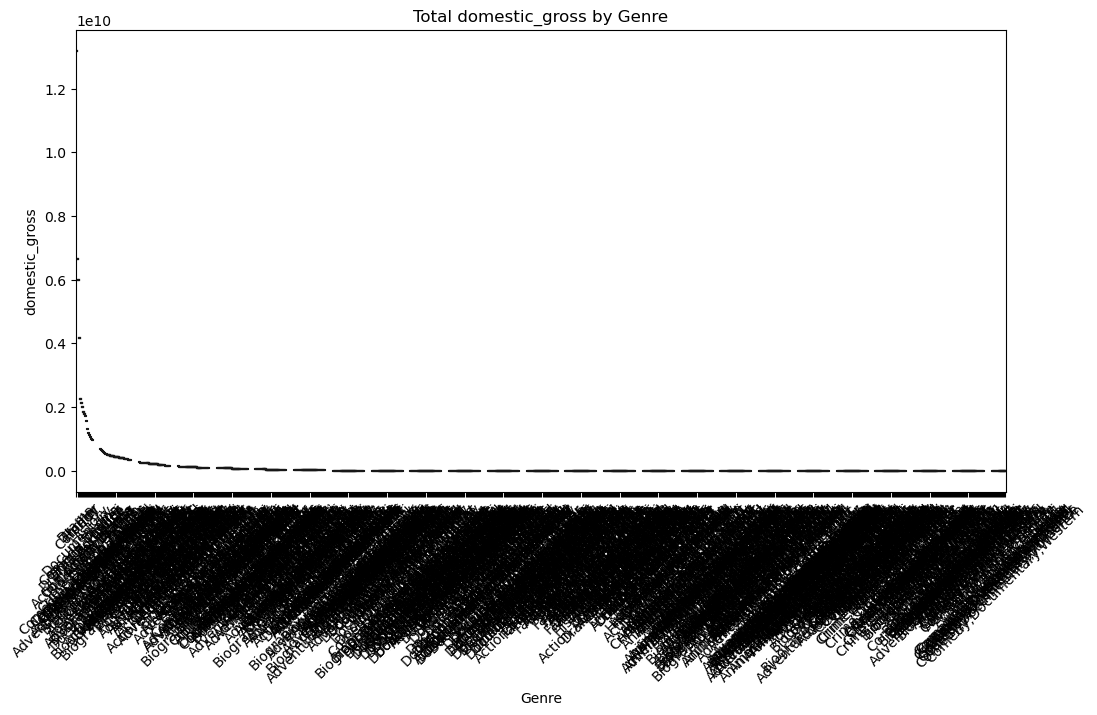

In [51]:
# Group by Genre
genre_grouped = df5.groupby('genres')['domestic_gross']

# Summary Statistics
# Compute summary statistics for each genre
genre_earnings_summary = genre_grouped.sum().sort_values(ascending=False)
print(genre_earnings_summary)

# Bar Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=genre_earnings_summary.index, y=genre_earnings_summary.values, palette='turbo')
plt.xlabel('Genre')
plt.ylabel('domestic_gross')
plt.title('Total domestic_gross by Genre')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Theres a direct relationship between the movie preference to the domestic_gross; the higher the rating in particular movie, the better the preference and the more an individual will be willing  to pay a price for it; e.gComedy,Documentary,Fantasy have a higher rating when we group by as per above diagram theres a increase in the domestic_gross.
An the domestic_gross prefereneces decreases with  a decrease in rating in particular movies.

In [56]:
# Group by Genre and calculate the mean rating
group_merged= df5.groupby('genres')['averagerating'].mean().reset_index()

# Sort by average rating in descending order
sort_group_merged = group_merged.sort_values(by='averagerating', ascending=False)

# Select the top 20 genres
top_20_genres = sort_group_merged.head(20)
top_20_genres



,genres,averagerating
442,"Comedy,Documentary,Fantasy",9.40
622,"Documentary,Family,Musical",9.30
824,Game-Show,9.00
763,"Drama,Short",8.80
670,"Documentary,News,Sport",8.80
668,"Documentary,News,Reality-TV",8.80
14,"Action,Adventure,Musical",8.70
410,"Biography,History,Music",8.50
185,"Adventure,Crime",8.50
878,"Mystery,News,Thriller",8.40


In [ ]:
DATA VISUALIZATION

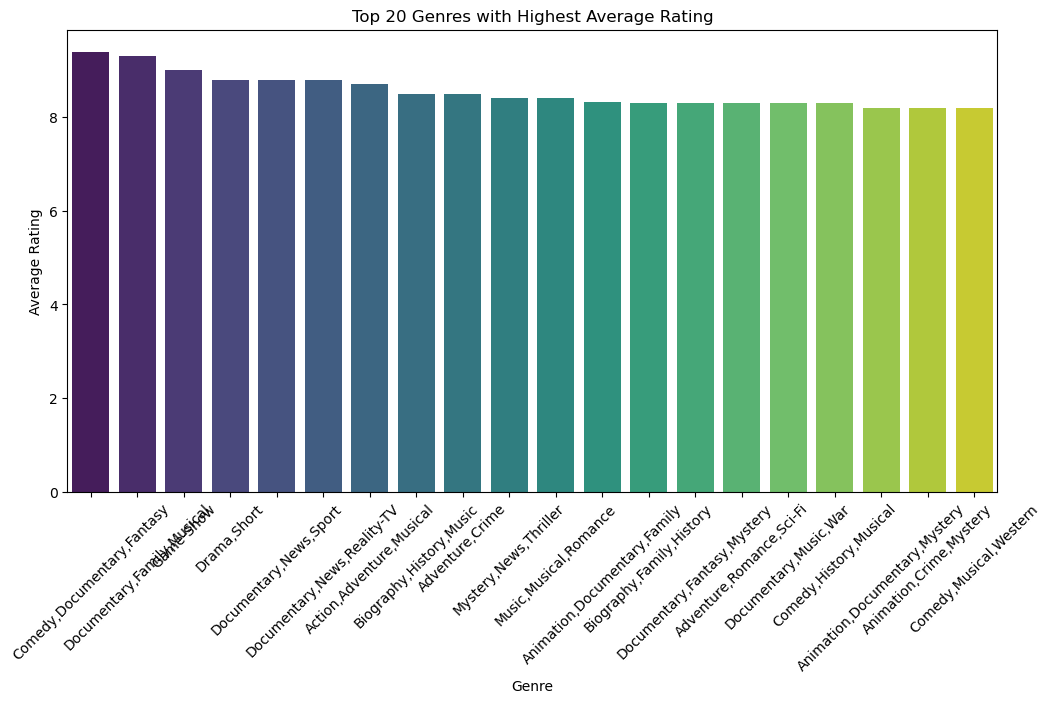

In [58]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='averagerating', data=top_20_genres, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top 20 Genres with Highest Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [68]:
# Group by Genre and calculate the mean rating
group_merged= df5.groupby('genres')['domestic_gross'].mean().reset_index()

# Sort by average rating in descending order
sort_group_merged = group_merged.sort_values(by='domestic_gross', ascending=False)

# Select the top 20 genres
top_20_genres = sort_group_merged.head(20)
top_20_genres


,genres,domestic_gross
825,History,3.691667e+08
292,"Animation,Crime,Drama",2.339000e+08
736,"Drama,Musical",1.857500e+08
249,"Adventure,Horror,Thriller",1.768000e+08
386,"Biography,Documentary,Sport",1.745500e+08
687,"Drama,Family,Music",1.743000e+08
307,"Animation,Drama,History",1.355000e+08
605,"Documentary,Drama,History",1.344039e+08
667,"Documentary,News",1.324000e+08
145,"Action,Thriller,War",1.251000e+08


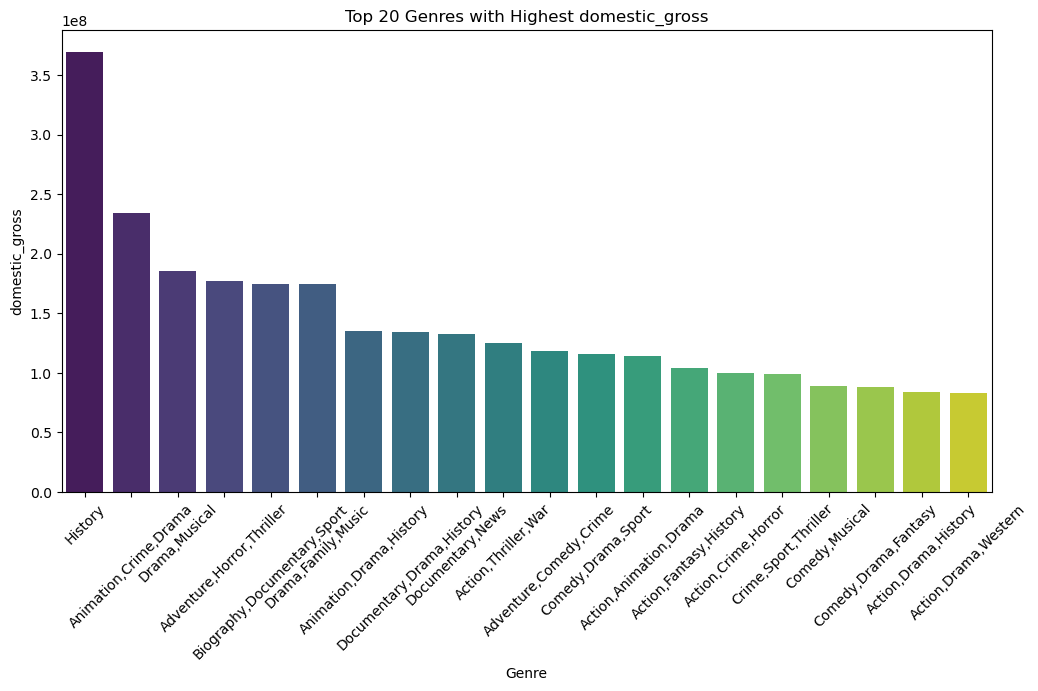

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='domestic_gross', data=top_20_genres, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('domestic_gross')
plt.title('Top 20 Genres with Highest domestic_gross')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [70]:
# Group by Genre and calculate the mean rating
group_merged= df5.groupby('averagerating')['domestic_gross'].mean().reset_index()

# Sort by average rating in descending order
sort_group_merged = group_merged.sort_values(by='domestic_gross', ascending=False)

# Select the top 20 genres
top_20_genres = sort_group_merged.head(20)
top_20_genres

,averagerating,domestic_gross
87,9.7,1.515021e+08
20,3.0,8.394073e+07
9,1.9,8.003307e+07
23,3.3,7.200219e+07
17,2.7,6.348749e+07
30,4.0,6.099103e+07
29,3.9,5.876530e+07
79,8.9,5.811007e+07
68,7.8,5.378721e+07
75,8.5,4.744806e+07


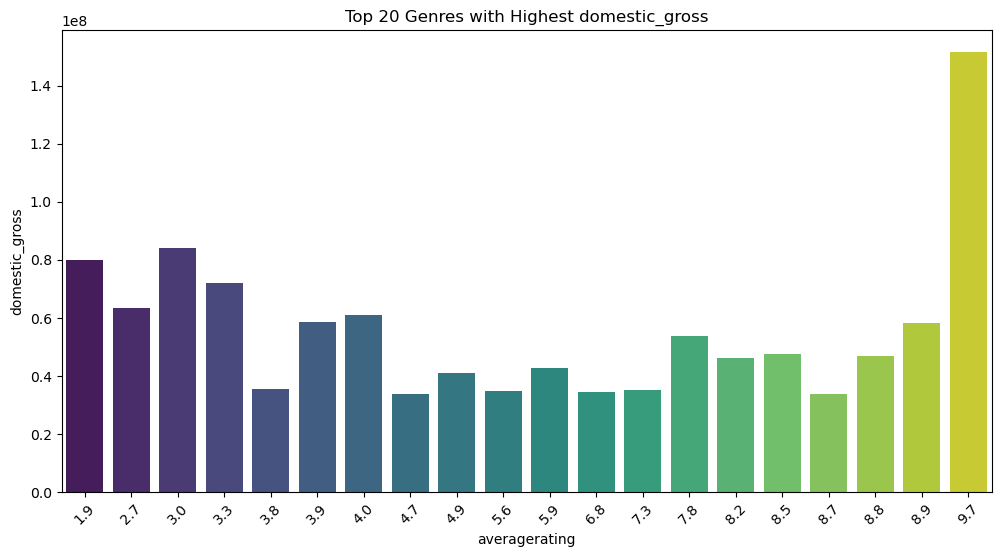

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x='averagerating', y='domestic_gross', data=top_20_genres, palette='viridis')
plt.xlabel('averagerating')
plt.ylabel('domestic_gross')
plt.title('Top 20 Genres with Highest domestic_gross')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
DEMOGRAPHIC FACTOR; Income segmentation

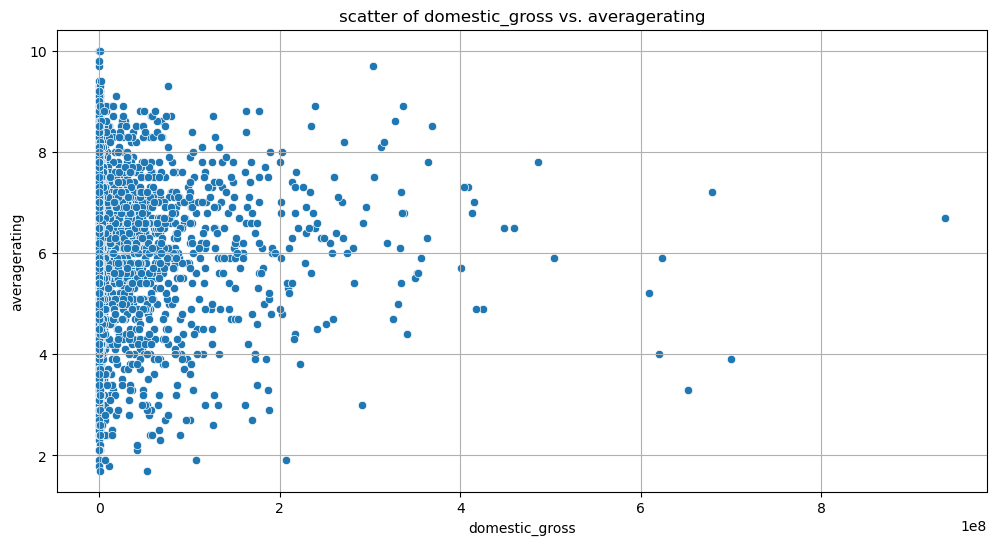

In [63]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.scatterplot(data=df5, x='domestic_gross', y='averagerating')  # Plot scatter plot with Seaborn
plt.title('scatter of domestic_gross vs. averagerating')  # Add title_
plt.xlabel('domestic_gross')  # Add x-axis label
plt.ylabel('averagerating')  # Add y-axis label
plt.grid(True)  # Add grid
plt.show()

Theres a positive correlation between the domestic_gross & the averageratings.

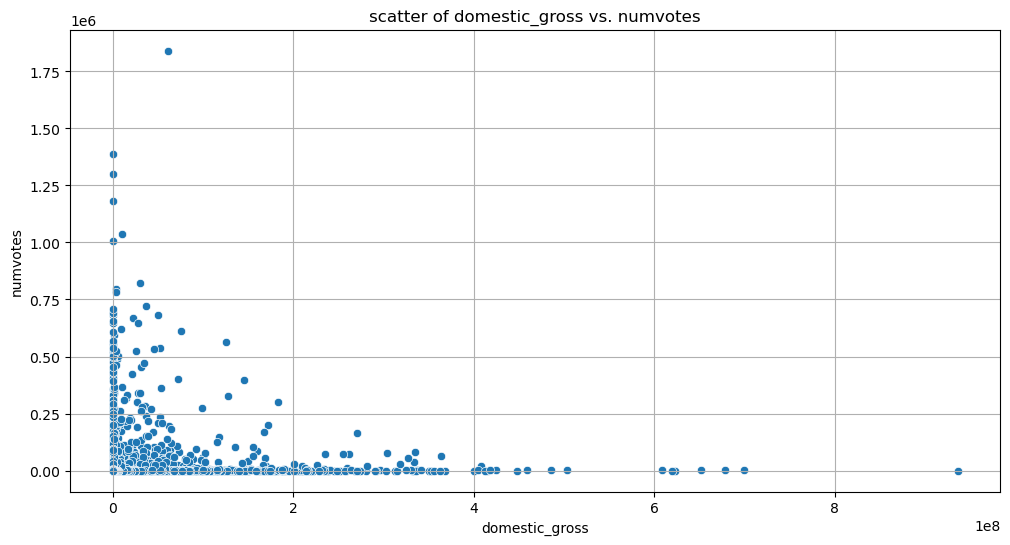

In [64]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.scatterplot(data=df5, x='domestic_gross', y='numvotes')  # Plot scatter plot with Seaborn
plt.title('scatter of domestic_gross vs. numvotes')  # Add title_
plt.xlabel('domestic_gross')  # Add x-axis label
plt.ylabel('numvotes')  # Add y-axis label
plt.grid(True)  # Add grid
plt.show()

In [ ]:
there is no correlation between the number of votes and the domestic gross thus a null correlation.

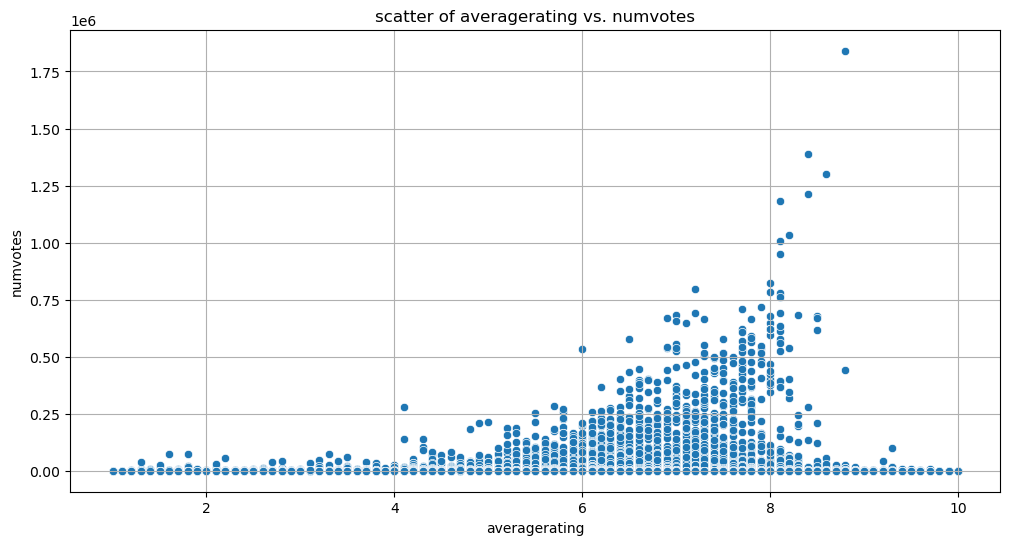

In [72]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.scatterplot(data=df5, x='averagerating', y='numvotes')  # Plot scatter plot with Seaborn
plt.title('scatter of averagerating vs. numvotes')  # Add title_
plt.xlabel('averagerating')  # Add x-axis label
plt.ylabel('numvotes')  # Add y-axis label
plt.grid(True)  # Add grid
plt.show()


In [ ]:
there is a linear relationship between the number of votes & average ratings

In [60]:
# Exclude non-numeric columns from correlation calculation
numeric_df5 = df5.select_dtypes(include=['number'])

# Calculate correlation coefficients
correlation_matrix = numeric_df5.corr()
print(correlation_matrix)

                 domestic_gross  start_year  runtime_minutes  averagerating  \
domestic_gross         1.000000    0.034406         0.012164      -0.004945   
start_year             0.034406    1.000000         0.002718       0.030649   
runtime_minutes        0.012164    0.002718         1.000000      -0.007076   
averagerating         -0.004945    0.030649        -0.007076       1.000000   
numvotes              -0.036322   -0.029532         0.012428       0.048756   

                 numvotes  
domestic_gross  -0.036322  
start_year      -0.029532  
runtime_minutes  0.012428  
averagerating    0.048756  
numvotes         1.000000  


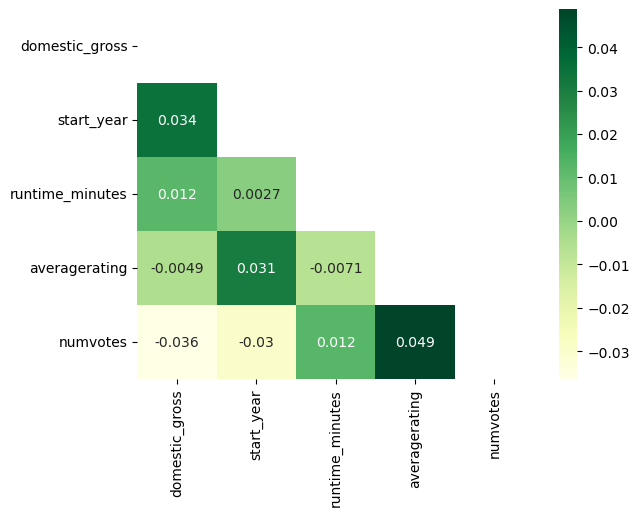

In [61]:
# Select only numeric columns
numeric_df5 = df5.select_dtypes(include=np.number)

# Create a mask
mask = np.triu(np.ones_like(numeric_df5.corr()))

# Plot the triangle correlation heatmap
sns.heatmap(numeric_df5.corr(), cmap="YlGn", annot=True, mask=mask)
plt.show()

There's a positive relationship between domestic_gross and the  start year 0.034.This means that people put their money in the latest movie released as compared to old movies.

There's a positive relationship between the runtime_minutes & number of votes (0.012)thus the longer the duration of the movie the more the votes it gets in terms of getting selected.

The latest movies released have higher rating than those which were released earlier hence a positive correlation.

However there is a negative correlation between domestic_gross &num of votes as well as average rating (-0.036)&(-0.0049)respectively.

<Figure size 300x200 with 0 Axes>

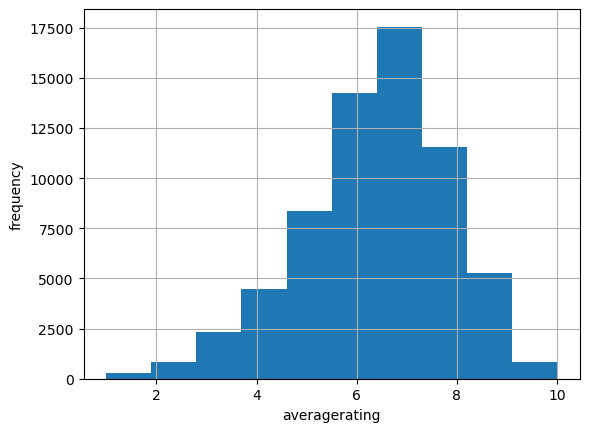

<Figure size 300x200 with 0 Axes>

In [74]:
df5['averagerating'].hist()
# plotting a line plot after changing it's width and height
plt.ylabel('frequency')
plt.xlabel('averagerating')
plt.figure(figsize=(3, 2))

<Figure size 300x200 with 0 Axes>

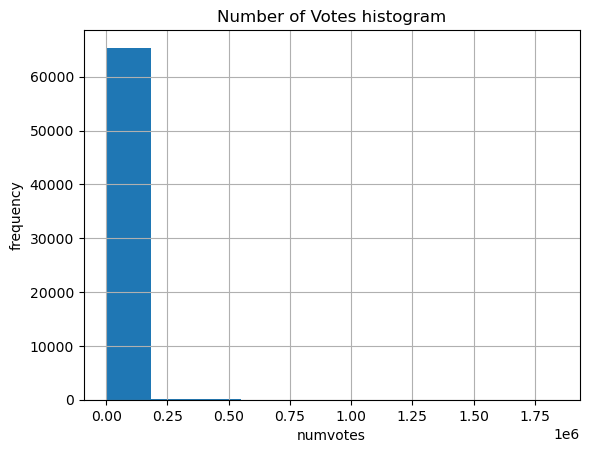

<Figure size 300x200 with 0 Axes>

In [75]:
df5['numvotes'].hist()
# plotting a line plot after changing it's width and height
plt.ylabel('frequency')
plt.xlabel('numvotes')
plt.title('Number of Votes histogram')
plt.figure(figsize=(3, 2))

<Figure size 300x200 with 0 Axes>

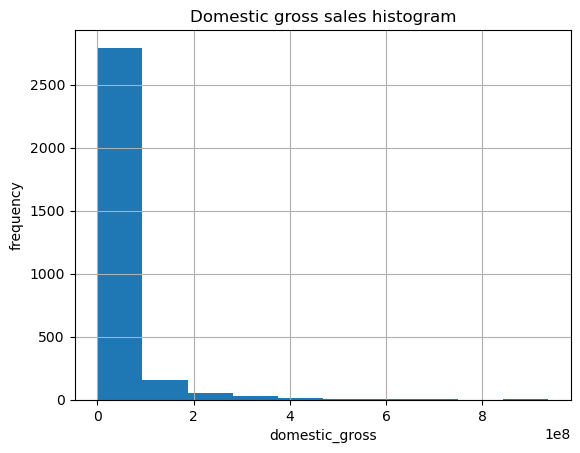

<Figure size 300x200 with 0 Axes>

In [76]:
df5['domestic_gross'].hist()
# plotting a line plot after changing it's width and height
plt.ylabel('frequency')
plt.xlabel('domestic_gross')
plt.title('Domestic gross sales histogram')
plt.figure(figsize=(3, 2))

In [ ]:
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. A distribution is said to be skewed if it's not symmetric. 

 Conclusions
 
 1. Commedy, documentary,fantasy has the highest ratings using barplot.
 2. History genres has the highest domestic gross earnings 
 3. Higher ratings has a positively correlated relationship with the domestic gross.
 
 

In [ ]:
*Recommendations*

For successful, sustained gross earnings over time, Microsoft  should produce History genres. The genre has the highest  amount of gross earnings of 369Million dollars per film

For immediately successful gross earnings, Microsoft should produce movies that are Commedy, documentary,fantasy has the highest ratings; which contribute to gross earning of at least 150 million dollars per film.

Thus for microsoft to maximize profits through the domestic_gross ; they should for ways to reduce their operating 
